11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


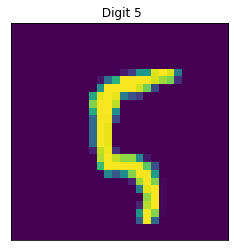

0 255


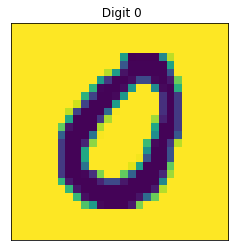

0.0 1.0
(28, 28, 1)


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# helper functions
def show_min_max(array, i):
  random_image = array[i]
  print(random_image.min(), random_image.max())

def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" Digit " + str(labels[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

imgR,imgC=28, 28
numClasses=10
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()
(train_images_backup, train_labels_backup),(test_images_backup,test_labels_backup)=mnist.load_data()

print(train_images.shape)
print(test_images.shape)

#reshape matrices
train_images = train_images.reshape(train_images.shape[0],  imgR, imgC, 1)
test_images = test_images.reshape(test_images.shape[0], imgR, imgC, 1) 
input_shape = (imgR, imgC, 1) 

train_images[3000:]=255-train_images[3000:] 

plot_image(train_images,100,train_labels)
show_min_max(train_images,100)

#scale to floats from 0-1
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images/=255
test_images/=255

plot_image(train_images,4563,train_labels)
show_min_max(train_images,100)

#one-hot encoding to scramble image order 
train_labels = keras.utils.to_categorical(train_labels, numClasses) 
test_labels = keras.utils.to_categorical(test_labels, numClasses)

print(train_images[1232].shape)

In [3]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten

epochs=12 #epochs = the number of times all images will go through the model
model=Sequential() #creates keras model
model.add(Flatten(input_shape=input_shape)) #adds flatten layer 
model.add(Dense(16, activation='relu')) #dense calculation layer using relu
model.add(Dense(10, activation='softmax')) 
model.summary()

#adam optimizer is fast and multipurpose, categorical crossentropy is a method of calculating loss
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
#feeds data, epochs, and shuffle bool
model.fit(train_images,train_labels,epochs=epochs,shuffle=True)

test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print("\nTest accuracy: ",test_acc)
model.save("mnistModel.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0363 - accuracy: 0.6696
Epoch 2/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5699 - accuracy: 0.8295
Epoch 3/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5146 - accuracy: 0.8467
Epoch 4/

In [4]:
from google.colab import files
from keras.preprocessing import image
from PIL import Image,ImageChops 

model=keras.models.load_model("mnistModel1.h5")

def predict_image(x): #takes in 3D Numpy array that represents an image
  x = x.astype('float32') 
  x/=255.0 #converts to 0-1 float scale

  x = np.expand_dims(x, axis=0) 

  image_predict = model.predict(x, verbose=0)

  plt.imshow(np.squeeze(x))
  plt.xticks([])
  plt.yticks([])
  plt.show()
  print("Predicted Label: ", np.argmax(image_predict))
  return image_predict

def plot_value_array(predictions_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([-100, 100])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  plt.show()

path="/content/test3w.jpg"
img=image.load_img(path,target_size=(28,28),color_mode="grayscale")
img_arr=image.img_to_array(img)
arr=predict_image(img_arr)
plot_value_array(arr,3)

OSError: ignored